## Exploration of "All France" Dataset

In [124]:
"""
Created on Tue Dec  3 19:30:54 2019

@author: jbb
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#plot seaborn-like graphics
sns.set()

In [125]:
#asso_data.head()

In [126]:
# load data
data_path="/home/jbb/Data/Data/12_Data4Good/small_data_shipped_v2/clean_data_small_v2.csv"
asso_data = pd.read_csv(data_path)

### clean the code postal column
### setup clean column
asso_data['adrg_codepostal_clean'] = np.nan# find only rows with numerics in the dataframe column  
only_nums = asso_data[pd.to_numeric(asso_data.adrg_codepostal, errors='coerce').notnull()]
# convert the values in this series to strings
code_postal_ints = only_nums.adrg_codepostal.astype(float).astype(int).astype(str)
# add extra 0 to front of postcodes that should start with 0 that are missing
code_postal_ints = code_postal_ints.apply(lambda x : ('0' + x) if len(x) == 4 else x)
# assign clean strings series to adrg_codepostal_clean column 
asso_data.loc[code_postal_ints.index, 'adrg_codepostal_clean'] = code_postal_ints.values

# mispelling or typo corrections - run just once

asso_data['object_social_group']=asso_data['object_social_group'].str.replace('services publics','services pub.')
asso_data['object_social_group']=asso_data['object_social_group'].str.replace('santé ', 'santé')
asso_data['object_social_group']=asso_data['object_social_group'].str.replace('autre', 'autres')


Nombre totale d'associations en France: 1531245
Pourcentage dans le domaine de la culture et des loisirs: 28.5 %
Pourcentage dans le domaine de l'action sociale: 18.8 %
Pourcentage dans le domaine des sports: 21.3 %
Pourcentage dans le domaine de l'éducation: 7.5 %
Pourcentage dans le domaine des réseaux: 10.2 %
Pourcentage dans le domaine de la santé: 3.4 %
Pourcentage dans le domaine de l'environnement: 3.2 %
Pourcentage dans le domaine des services publiques: 0.6 %
Pourcentage dans les autres domaines: 6.5 %


[Text(0, 0.5, ''),
 Text(0.5, 0, 'Objets sociales'),
 Text(0.5, 1.0, 'Activité des associations loi 1901 en France')]

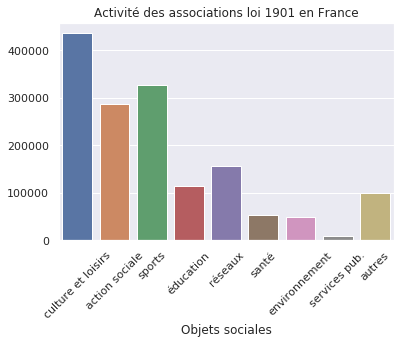

In [129]:
# plot for the entire France
class_order = ['culture et loisirs','action sociale','sports','éducation','réseaux','santé','environnement','services pub.','autres']
ax = sns.countplot(x="object_social_group", data=asso_data,order=class_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel='Objets sociales',ylabel='',title='Activité des associations loi 1901 en France')

In [130]:
# Create dataframe for Isère

df_isere = asso_data
df_isere['departement'] = df_isere['adrg_codepostal'].astype(str).str[:2]
df_isere = df_isere[df_isere.departement == '38']

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Objets sociales'),
 Text(0.5, 1.0, 'Activité des associations loi 1901 en Isère')]

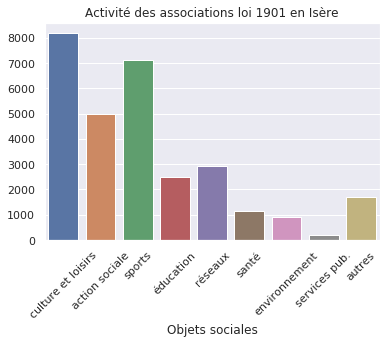

In [131]:
# plot for Isere
ax = sns.countplot(x="object_social_group", data=df_isere,order=class_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel='Objets sociales', ylabel='', title='Activité des associations loi 1901 en Isère')

In [132]:
# Create dataframe for the Metro municipalities community.
codes_metro  =['38000','38100','38113','38120','38130','38170','38180','38220','38240','38320','38360','38400','38410','38420','38450','38560','38600','38610','38640','38700','38760','38800','38950']
df_metro = df_isere[df_isere['adrg_codepostal'].isin(codes_metro)]

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Objets sociales'),
 Text(0.5, 1.0, 'Activité des associations loi 1901 de Grenoble Alpes Métropole')]

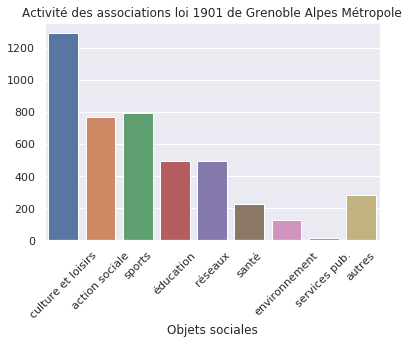

In [133]:
# plot for Isere
ax = sns.countplot(x="object_social_group", data=df_metro,order=class_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel='Objets sociales', ylabel='', title='Activité des associations loi 1901 de Grenoble Alpes Métropole')

In [189]:
# table of distribution of associations by class
arr = np.empty(len(class_order))
vect = np.empty(len(class_order))
for counter, value in enumerate(class_order):
    arr[counter] = round(asso_data[asso_data['object_social_group'] == value].count()[1]/len(asso_data)*100,1)
for counter, value in enumerate(class_order):
    vect[counter] = round(df_isere[df_isere['object_social_group'] == value].count()[1]/len(df_isere)*100,1)
arr = np.vstack([arr,vect])
for counter, value in enumerate(class_order):
    vect[counter] = round(df_metro[df_metro['object_social_group'] == value].count()[1]/len(df_metro)*100,1)
arr = np.vstack([arr,vect])

arr = np.insert(arr,0,[len(asso_data),len(df_isere),len(df_metro)],axis = 1)
print(arr)
    

[[1.531245e+06 2.850000e+01 1.880000e+01 2.130000e+01 7.500000e+00
  1.020000e+01 3.400000e+00 3.200000e+00 6.000000e-01 6.500000e+00]
 [2.967200e+04 2.760000e+01 1.680000e+01 2.400000e+01 8.400000e+00
  9.900000e+00 3.800000e+00 3.100000e+00 7.000000e-01 5.700000e+00]
 [4.485000e+03 2.880000e+01 1.710000e+01 1.760000e+01 1.100000e+01
  1.110000e+01 5.100000e+00 2.800000e+00 3.000000e-01 6.200000e+00]]


In [194]:

for i in range (0,3):
    print('Nombre totale d\'associations:',arr[i,0])
    print('Pourcentage dans le domaine de la culture et des loisirs:',round(arr[i,1],1),'%')
    print('Pourcentage dans le domaine de l\'action sociale:',round(arr[0,2],1),'%')
    print('Pourcentage dans le domaine des sports:',round(arr[i,2],1),'%')
    print('Pourcentage dans le domaine de l\'éducation:',round(arr[i,3],1),'%')
    print('Pourcentage dans le domaine des réseaux:',round(arr[i,4],1),'%')
    print('Pourcentage dans le domaine de la santé:',round(arr[i,5],1),'%')
    print('Pourcentage dans le domaine de l\'environnement:',round(arr[i,6],1),'%')
    print('Pourcentage dans le domaine des services publiques:',round(arr[i,7],1),'%')
    print('Pourcentage dans les autres domaines:',round(arr[i,8],1),'%')



Nombre totale d'associations: 1531245.0
Pourcentage dans le domaine de la culture et des loisirs: 28.5 %
Pourcentage dans le domaine de l'action sociale: 18.8 %
Pourcentage dans le domaine des sports: 18.8 %
Pourcentage dans le domaine de l'éducation: 21.3 %
Pourcentage dans le domaine des réseaux: 7.5 %
Pourcentage dans le domaine de la santé: 10.2 %
Pourcentage dans le domaine de l'environnement: 3.4 %
Pourcentage dans le domaine des services publiques: 3.2 %
Pourcentage dans les autres domaines: 0.6 %
Nombre totale d'associations: 29672.0
Pourcentage dans le domaine de la culture et des loisirs: 27.6 %
Pourcentage dans le domaine de l'action sociale: 18.8 %
Pourcentage dans le domaine des sports: 16.8 %
Pourcentage dans le domaine de l'éducation: 24.0 %
Pourcentage dans le domaine des réseaux: 8.4 %
Pourcentage dans le domaine de la santé: 9.9 %
Pourcentage dans le domaine de l'environnement: 3.8 %
Pourcentage dans le domaine des services publiques: 3.1 %
Pourcentage dans les autres